# 🌈 Seaborn Basics

- Seaborn builds on top of Matplotlib — it gives you prettier, easier plots.

##### Line graph

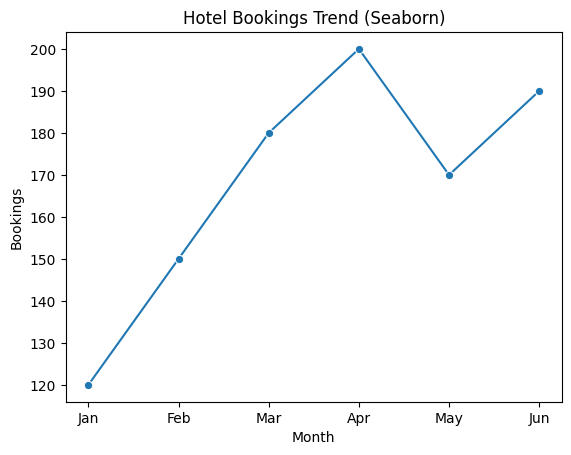

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Sample Data: Monthly hotel room bookings
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
bookings = [120, 150, 180, 200, 170, 190]


# Create a dataset
data = {
    'Month': months,
    'Bookings': bookings
}
df = pd.DataFrame(data)

# Simple line plot with seaborn
sns.lineplot(data=df, x='Month', y='Bookings', marker='o')
plt.title("Hotel Bookings Trend (Seaborn)")
plt.show()

#### Bar Graph

C:\Users\datacore\AppData\Local\Temp\ipykernel_5124\1655359421.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month', y='Bookings', palette='viridis')


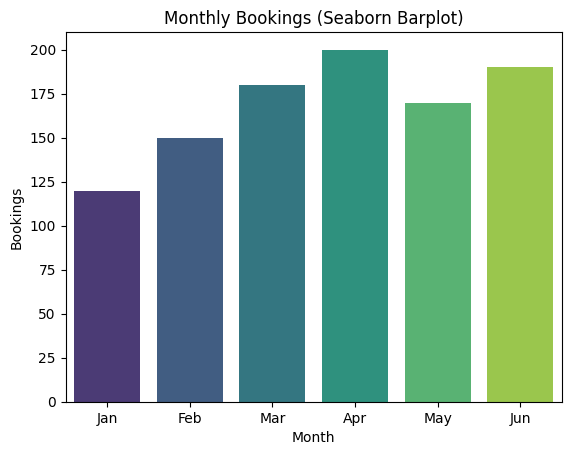

In [3]:
sns.barplot(data=df, x='Month', y='Bookings', palette='viridis')
plt.title("Monthly Bookings (Seaborn Barplot)")
plt.show()


#### Scatter Plot

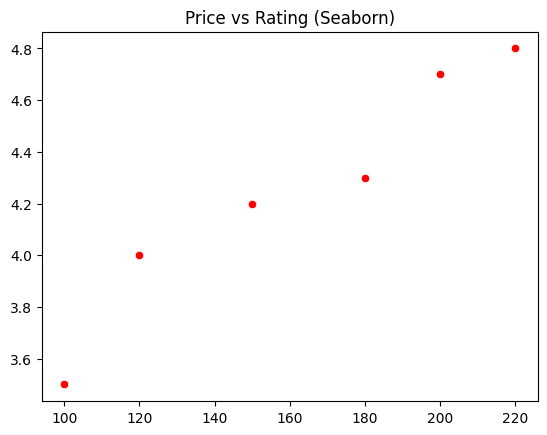

In [6]:
# Relationship between room price and customer rating
price = [100, 120, 150, 180, 200, 220]
rating = [3.5, 4.0, 4.2, 4.3, 4.7, 4.8]

sns.scatterplot(x=price, y=rating, color='red')
plt.title("Price vs Rating (Seaborn)")
plt.show()

##### Creating dataset

In [7]:
import numpy as np

# Sample data for 2 hotels
df2 = pd.DataFrame({
    'Hotel': np.random.choice(['Hotel A', 'Hotel B'], 100),
    'Month': np.random.choice(months, 100),
    'Revenue': np.random.randint(50000, 150000, 100),
    'Occupancy_Rate': np.random.uniform(0.5, 1.0, 100)
})

##### 🔹 Box Plot — To Compare Distributions

C:\Users\datacore\AppData\Local\Temp\ipykernel_5124\3487034151.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='Hotel', y='Revenue', palette='cool')


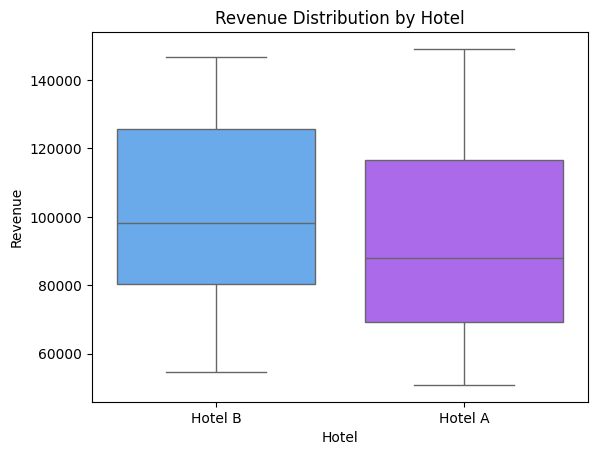

In [8]:
sns.boxplot(data=df2, x='Hotel', y='Revenue', palette='cool')
plt.title("Revenue Distribution by Hotel")
plt.show()


- 👉 Helps find outliers and compare hotels’ financial performance.

##### 🔹 Heatmap — Correlation Between Variables

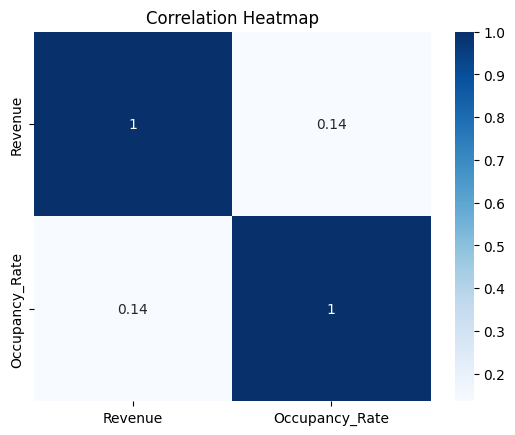

In [9]:
corr = df2[['Revenue', 'Occupancy_Rate']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


- 👉 Reveals relationships between metrics — e.g., revenue increases with occupancy.

### Seaborn (intermediate level)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a simulated dataset
np.random.seed(42)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

hotel_data = pd.DataFrame({
    'Hotel': np.random.choice(['Hotel A', 'Hotel B'], 200),
    'Month': np.random.choice(months, 200),
    'Revenue': np.random.randint(50000, 200000, 200),
    'Occupancy_Rate': np.random.uniform(0.5, 1.0, 200),
    'Customer_Rating': np.random.uniform(3.0, 5.0, 200),
    'Average_Daily_Rate': np.random.randint(80, 250, 200)
})

hotel_data.head()


,Hotel,Month,Revenue,Occupancy_Rate,Customer_Rating,Average_Daily_Rate
0,Hotel A,Jan,95714,0.975031,4.598821,189
1,Hotel B,Apr,152946,0.975304,4.255801,243
2,Hotel A,May,159616,0.786719,3.163518,136
3,Hotel A,Apr,155983,0.815919,4.747157,80
4,Hotel A,Jun,174123,0.724223,4.841745,142


Columns meaning:

- Hotel: Name of hotel
- Month: Booking month
- Revenue: Total revenue that month
- Occupancy_Rate: Fraction of rooms occupied
- Customer_Rating: Average rating by guests (out of 5)
- Average_Daily_Rate: Price per night

#### Distribution Plots — histplot, kdeplot

- These help us understand data spread (like how revenues are distributed).

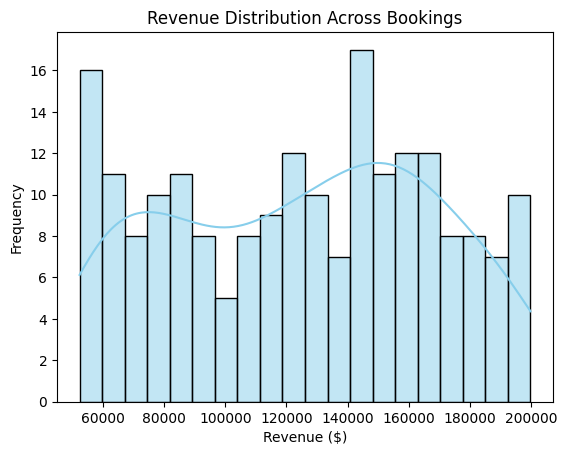

In [11]:
sns.histplot(hotel_data['Revenue'], bins=20, kde=True, color='skyblue')
plt.title("Revenue Distribution Across Bookings")
plt.xlabel("Revenue ($)")
plt.ylabel("Frequency")
plt.show()

#### 🔍 Explanation

- histplot() → histogram of frequency counts
- kde=True adds a smooth Kernel Density Estimation curve
- Helps identify: skewness, typical revenue range, and outliers.



#### KDE Plot Alone

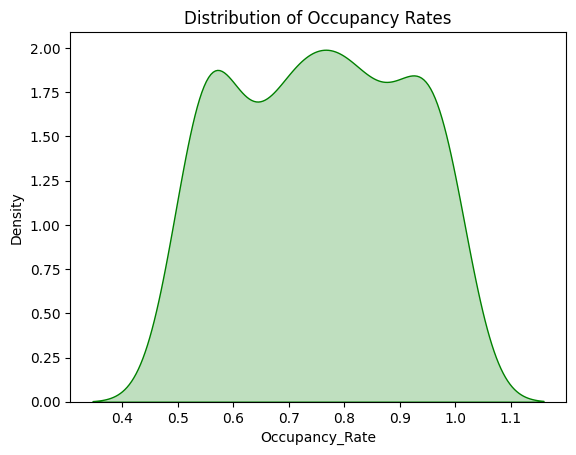

In [12]:
sns.kdeplot(data=hotel_data, x='Occupancy_Rate', fill=True, color='green')
plt.title("Distribution of Occupancy Rates")
plt.show()


#### Relationship Plots — pairplot and jointplot

- These show relationships between multiple numeric variables.

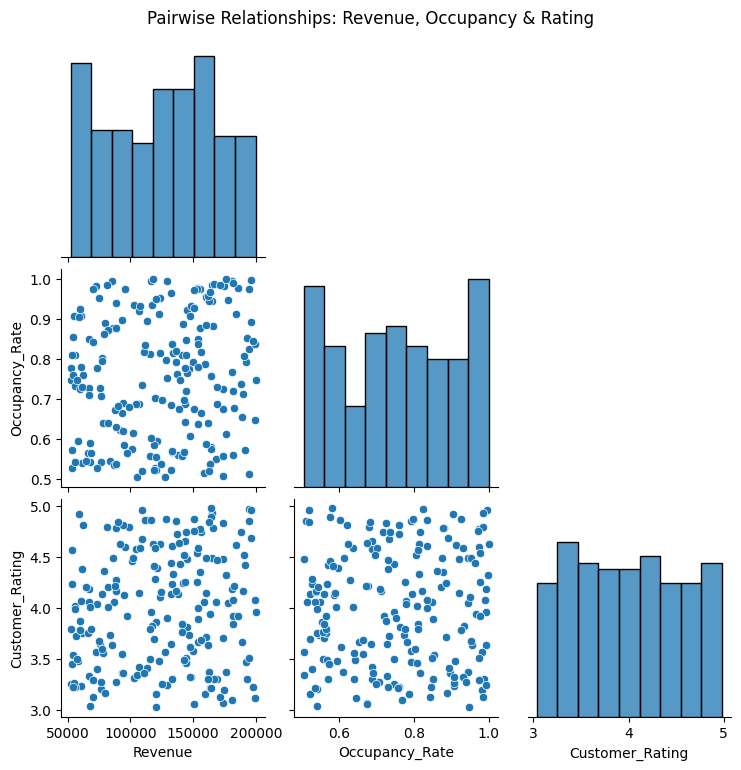

In [13]:
sns.pairplot(hotel_data[['Revenue', 'Occupancy_Rate', 'Customer_Rating']], corner=True)
plt.suptitle("Pairwise Relationships: Revenue, Occupancy & Rating", y=1.02)
plt.show()



🔍 **What it shows:**
- Each cell shows how two variables relate — e.g., higher occupancy ↔ higher revenue.

**Business interpretation:**
- If revenue grows with occupancy but not strongly with rating, focus on filling rooms before improving ratings.

## Mini Project — Hotel Insights Dashboard

C:\Users\datacore\AppData\Local\Temp\ipykernel_5124\3727357375.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hotel_data, x='Hotel', y='Revenue', palette='cool')


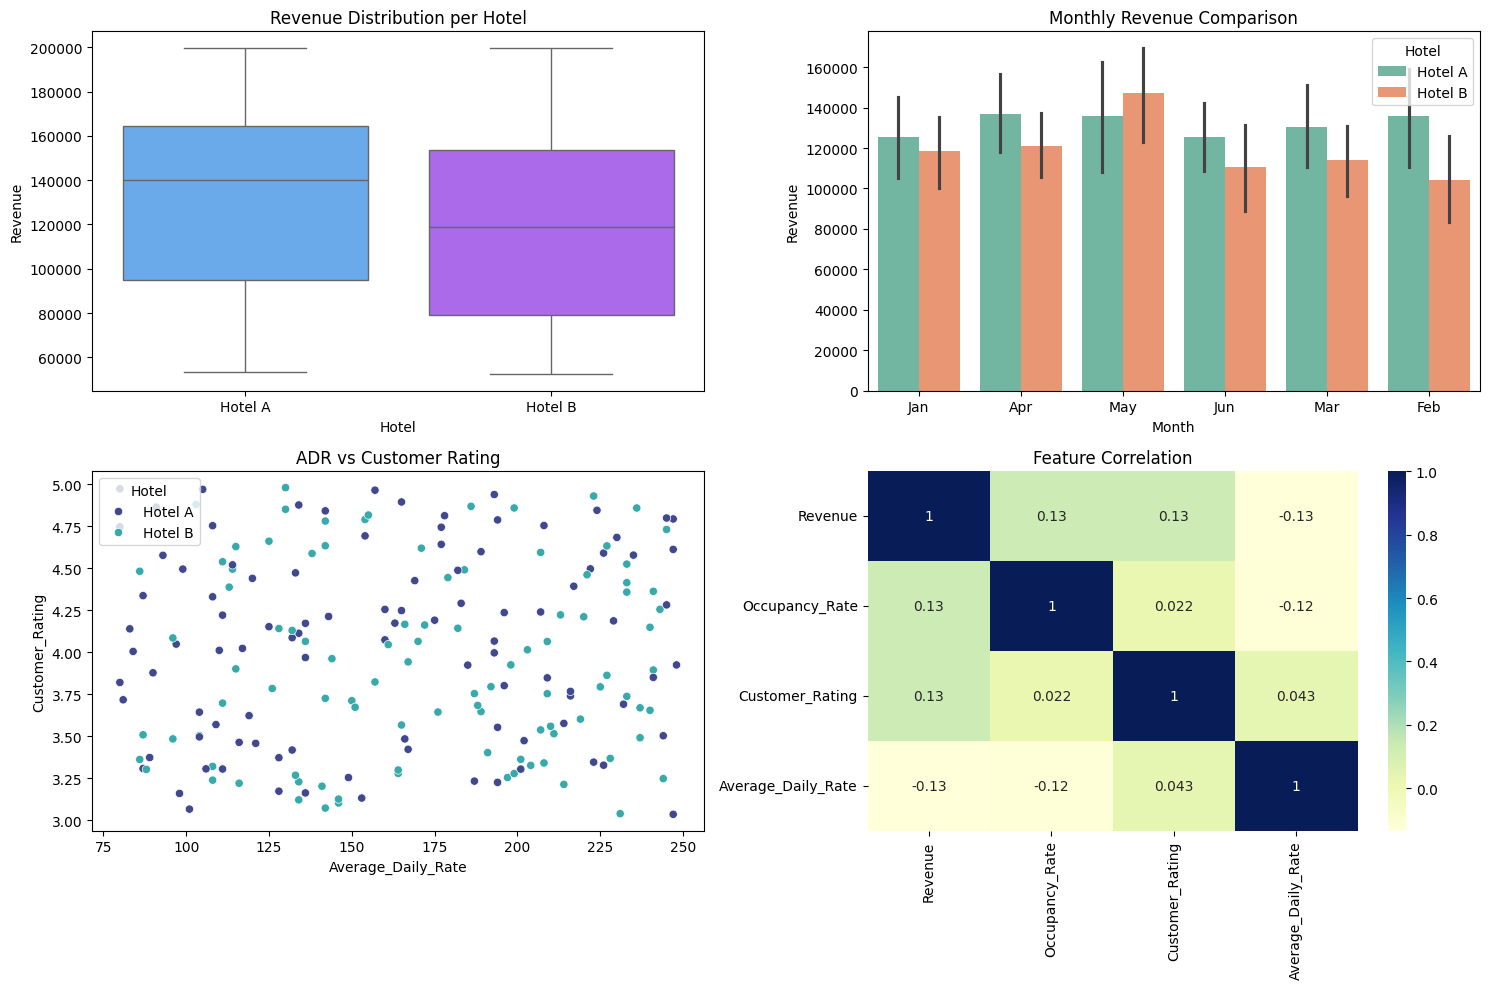

In [16]:
plt.figure(figsize=(15,10))

# 1. Revenue by Hotel
plt.subplot(2,2,1)
sns.boxplot(data=hotel_data, x='Hotel', y='Revenue', palette='cool')
plt.title("Revenue Distribution per Hotel")

# 2. Monthly Trends
plt.subplot(2,2,2)
sns.barplot(data=hotel_data, x='Month', y='Revenue', hue='Hotel', palette='Set2')
plt.title("Monthly Revenue Comparison")

# 3. Price vs Rating
plt.subplot(2,2,3)
sns.scatterplot(data=hotel_data, x='Average_Daily_Rate', y='Customer_Rating', hue='Hotel', palette='mako')
plt.title("ADR vs Customer Rating")

# 4. Correlation Heatmap
plt.subplot(2,2,4)
corr = hotel_data[['Revenue', 'Occupancy_Rate', 'Customer_Rating', 'Average_Daily_Rate']].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Feature Correlation")

plt.tight_layout()
plt.show()


🧠 **Insights** :

- Which hotel has steadier revenue    --> (from boxplot)
- Which months yield higher earnings  --> (from barplot)
- Does pricing correlate with ratings --> (scatter)
- Which features most affect revenue  --> (heatmap)


This is exactly how hospitality analysts or data scientists in hotel chains visualize their KPIs (Key Performance Indicators).

## Mini Business Example — “Café Insights Dashboard”

**Scenario:**
- **You run a café and have data on total bill, tips, and days.**

You want to find:
- Which day gives highest revenue
- Relationship between bill and tip
- Average tip per gender

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load built-in dataset
# tips dataset contains restaurant bill information — useful for real-world analysis.
data = sns.load_dataset('tips')
print(data.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


C:\Users\datacore\AppData\Local\Temp\ipykernel_21212\694583617.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day', y='total_bill', data=data, estimator='mean', ci=None)


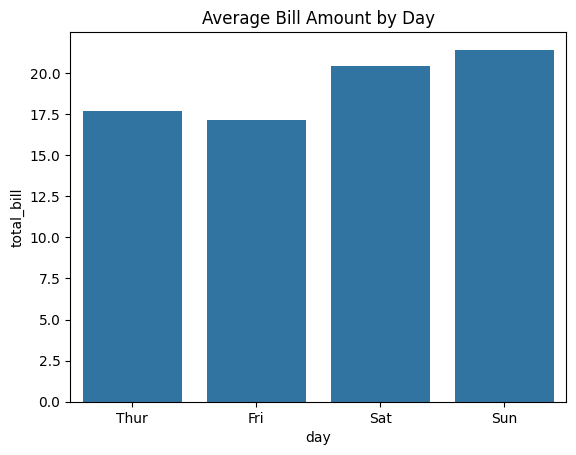

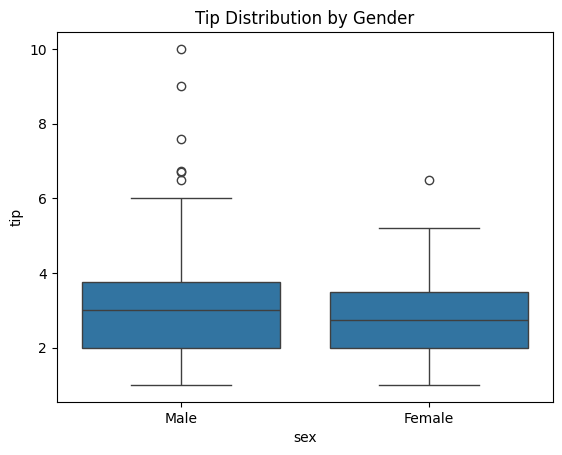

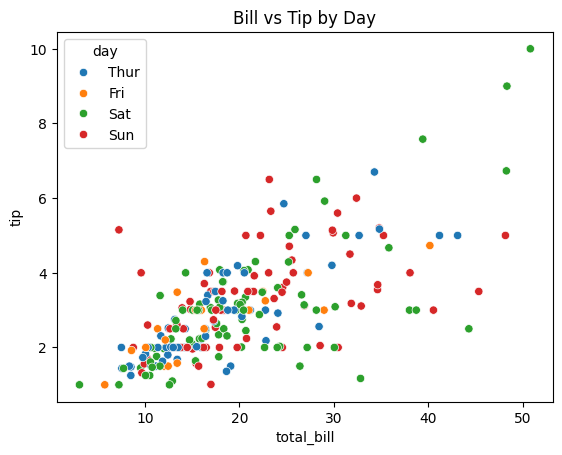

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset('tips')

# 1️⃣ Average bill by day
sns.barplot(x='day', y='total_bill', data=data, estimator='mean', ci=None)
plt.title("Average Bill Amount by Day")
plt.show()

# 2️⃣ Tip distribution by gender
sns.boxplot(x='sex', y='tip', data=data)
plt.title("Tip Distribution by Gender")
plt.show()

# 3️⃣ Relationship between total bill and tip
sns.scatterplot(x='total_bill', y='tip', data=data, hue='day')
plt.title("Bill vs Tip by Day")
plt.show()


✅ Insights:

- Weekends (Sat/Sun) usually bring higher average bills
- Bills and tips are positively correlated